In [2]:
import sympy as sym

import repeated_play

In [3]:
import numpy as np

In [4]:
sym.init_printing(True)

In [5]:
pc, pd, epsilon = sym.symbols("pc, pd, \epsilon")

In [6]:
b, c = sym.symbols("b, c")

In [7]:
tft = [1 * (1 - epsilon), 1 * epsilon, 1 * (1 - epsilon), 1 * epsilon]

In [8]:
gtft = sym.Matrix([1 * (1 - epsilon), (1 - c/b) * (1 - epsilon) + c/b * epsilon,
        1 * (1 - epsilon), (1 - c/b) * (1 - epsilon) + c/b * epsilon]).T

In [9]:
gtft.subs({epsilon:0})

In [10]:
M = repeated_play.transition_matrix_repeated_game([pc, pd, pc, pd], tft, memory='one', analytical=True)

ss = repeated_play.stationary_distribution(M, analytical=True)

In [11]:
tft_payoff = sum(ss @ sym.Matrix([b - c, -c, b, 0]))

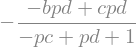

In [12]:
sym.nsimplify(tft_payoff.factor().subs({epsilon:0}))

In [13]:
player = [pc * (1 - epsilon) + pd * epsilon, pd * (1 - epsilon) + pc * epsilon,
          pc * (1 - epsilon) + pd * epsilon, pd * (1 - epsilon) + pc * epsilon]

In [14]:
M = repeated_play.transition_matrix_repeated_game(player, gtft, memory='one', analytical=True)

ss = repeated_play.stationary_distribution(M, analytical=True)

In [15]:
player_payoff = sum(ss @ sym.Matrix([b - c, -c, b, 0]))

In [16]:
expr = player_payoff.factor().collect(pc).collect(pd)

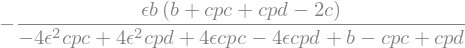

In [17]:
(expr - (b - c)).factor()

In [18]:
M = repeated_play.transition_matrix_repeated_game(gtft, gtft, memory='one', analytical=True)

ss = repeated_play.stationary_distribution(M, analytical=True)

In [19]:
gtft_payoff = sum(ss @ sym.Matrix([b - c, b, -c, 0]))

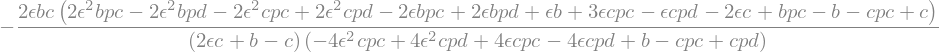

In [20]:
(expr - gtft_payoff).factor()

### Numerical

In [21]:
bval = 1
cval = 1/2

epsval = 10 ** -3

In [22]:
GTFT = np.array([1, 1/2, 1, 1/2])

In [23]:
GTFT_error = GTFT * (1 - epsval) + (1 - GTFT) * epsval

In [24]:
coplayer = np.random.random(4)

In [25]:
coplayer_error = coplayer * (1 - epsval) + (1 - coplayer) * epsval

In [26]:
M = repeated_play.transition_matrix_repeated_game(GTFT, coplayer, memory="one")

ss = repeated_play.stationary_distribution(M)

M1 = repeated_play.transition_matrix_repeated_game(GTFT, GTFT, memory="one")

ss1 = repeated_play.stationary_distribution(M1)

In [27]:
ss[0] @ np.array([bval - cval, bval, -cval, 0])

In [28]:
ss1[0] @ np.array([bval - cval, bval, -cval, 0])

In [29]:
M = repeated_play.transition_matrix_repeated_game(GTFT_error, coplayer_error, memory="one")

ss = repeated_play.stationary_distribution(M)

print(len(ss))

M1 = repeated_play.transition_matrix_repeated_game(GTFT_error, GTFT_error, memory="one")

ss1 = repeated_play.stationary_distribution(M1)

print(len(ss1))

1
1


In [30]:
ss[0] @ np.array([bval - cval, bval, -cval, 0])

In [31]:
ss1[0] @ np.array([bval - cval, bval, -cval, 0])

In [32]:
b0, b1 = sym.symbols("b_0, b_1")

In [33]:
pointA = [c/b, 0]
pointB = [1, 1 - c/b]

In [34]:
solb1 = sym.solve(pointA[0] * b0 + b1 - pointA[1], b1)

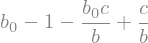

In [35]:
expr = (pointB[0] * b0 + b1 - pointB[1]).subs({b1: solb1[0]})
expr

In [36]:
sym.solve(expr, b0)

In [37]:
solb1[0].subs({b0:1})

In [38]:
1 * (1 - epsval)

In [39]:
(1 * (1 - epsval)) -  cval/bval

In [40]:
1 - (1 * (1 - epsval)) * cval/bval

In [51]:
GTFT_error = [0.999, 0.499, 0.999, 0.499]

In [52]:
M = repeated_play.transition_matrix_repeated_game(GTFT_error, coplayer_error, memory="one")

ss = repeated_play.stationary_distribution(M)

M1 = repeated_play.transition_matrix_repeated_game(GTFT_error, GTFT_error, memory="one")

ss1 = repeated_play.stationary_distribution(M1)

In [53]:
ss[0] @ np.array([bval - cval, bval, -cval, 0])

In [54]:
ss1[0] @ np.array([bval - cval, bval, -cval, 0])

In [55]:
(1 - cval/bval) * (1 - epsilon) + (1 - (1 - cval/bval)) * epsilon